# selenium 이용한 크롤링
- [직장인을 위한 데이터 분석 실무] - p.51 ~
- `requests` 진행시 소스를 받아오지 못하는 경우에 사용 

### selenium 이란?
- 줄 웹앱을 테스트하는데 사용하는 프레임워크
- `webdriver`라는 API를 통해 운영체제에 설치된 크롬 등의 브라우저를 제어
- `selenium` module 설치 후 사용 
- 사용 브라우저 (Chrome, Edge, ... )에 맞는 webdriver를 다운로드 후 사용 가능
- 다운로드 사이트에서 본인이 사용하는 브라우저의 버전 등을 확인 후 사용 
- 크롬: https://chromedriver.chromium.org/downloads
- Edge: https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/- 
- 파이어폭스:https://github.com/mozilla/geckodriver/releases

### Chrome driver 다운 
1. 본인 크롬의 크롬 브라우저 버전 확인 (오른쪽 상단 점3개 클릭 -> 도움말 -> Chrome 정보 -> 버전확인)
2. 크롬 : https://chromedriver.chromium.org/downloads

In [14]:
#!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import time
from bs4 import BeautifulSoup as bs
import pandas as pd


In [15]:
import os
os.getcwd()

'/Users/hyunjinkim/Desktop/multi/0325'

#### 네이버 블로그

In [16]:

driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")

url = "https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EA%B5%AD%EB%82%B4%20%EC%97%AC%ED%96%89%EC%A7%80%20%EC%B6%94%EC%B2%9C"
driver.get(url)
time.sleep(2)

soup = driver.page_source


txt_soup = driver.find_elements_by_css_selector("title")
txt_soup

/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/491792488.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")
/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/491792488.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  txt_soup = driver.find_elements_by_css_selector("title")


[<selenium.webdriver.remote.webelement.WebElement (session="cd2fdaccca33461f1c6fd7a49094ee73", element="05506226-4e24-4563-bd05-a4fb396c0141")>]

In [41]:
# 크롬 드라이버 실행
driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")

# URL 접속
url = "https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=%EA%B5%AD%EB%82%B4%20%EC%97%AC%ED%96%89%EC%A7%80%20%EC%B6%94%EC%B2%9C"
driver.get(url)
time.sleep(2) # 페이지가 뜨는 순간 기다리게끔 시간 지연시켜줌  

# 웹 페이지의 HTML 다운
html = driver.page_source

# HTML 문자열 bs로 해석
soup = bs(html, "html.parser") #.text 안해줘도 됨 


/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/482977011.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")


In [43]:

post_soup = soup.find_all("div", class_="list_search_post")         # 포스트 찾기
print(post_soup[0].find("strong", class_="title_post").get_text()) # 포스트 제목
print(post_soup[0].find("a")["href"])                              # 포스트 하이퍼 링크





국내 여행지 추천 여수 오동도 가는법 동백열차, 자전거 비교

https://blog.naver.com/wkwmd81/222674036269


In [45]:
post_soup = soup.find_all("div", class_="list_search_post")    
post_list = []
for post in post_soup:
    title = post.find("strong", class_="title_post").get_text()
    href = post.find("a")["href"] 
    post_list.append({"제목":title, "링크":href})
    
# post_list - DataFrame 구조로 바꾸기    
df = pd.DataFrame(post_list)
df

,제목,링크
0,"\n국내 여행지 추천 여수 오동도 가는법 동백열차, 자전거 비교\n",https://blog.naver.com/wkwmd81/222674036269
1,\n국내 여행지 추천 여수 오동도 볼거리 여수동백꽃\n,https://blog.naver.com/hloveh01/222661399374
2,\n2월 국내 여행지 추천 강원도 정동진 해변 일출 여행 해수욕장 우리나라 해안\n,https://blog.naver.com/tcacyc/222651575998
3,\n국내 여행지 추천 단양 가볼만한곳 도담삼봉 석문\n,https://blog.naver.com/00sweetlove/222605721560
4,"\n6월 국내여행지 추천, 당진 아그로랜드 수레국화 명소\n",https://blog.naver.com/invu1657/222388254597
5,\n국내 여행지 추천 아이와 경상도 가볼만한곳 합천 영상테마파크\n,https://blog.naver.com/hp0210/222670926660
6,\n국내 여행지 추천 속초 영랑호 호수 위를 걷는 영랑호수윗길\n,https://blog.naver.com/ontheroad_gh/222651725242


In [20]:
df.index

Index([], dtype='object')

In [46]:
for i in df.index:
    driver.get(df.loc[i, "링크"])
    time.sleep(2)
    
    html = driver.page_source
    soup = bs(html, "html.parser")
    print("http://blog.naver.com/"+ soup.find("iframe", id="mainFrame")["src"])

http://blog.naver.com//PostView.naver?blogId=wkwmd81&logNo=222674036269&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=hloveh01&logNo=222661399374&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=tcacyc&logNo=222651575998&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=00sweetlove&logNo=222605721560&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=invu1657&logNo=222388254597&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=hp0210&logNo=222670926660&redirect=Dlog&widgetTypeCall=true&directAccess=false
http://blog.naver.com//PostView.naver?blogId=ontheroad_gh&logNo=222651725242&redirect=Dlog&widgetTypeCall=true&directAccess=false


In [50]:
import requests

html = requests.get("http://blog.naver.com/PostView.naver?blogId=wkwmd81&logNo=222674036269&redirect=Dlog&widgetTypeCall=true&directAccess=false")
soup = bs(html.text, "html.parser")
soup.find("div", class_="se-main-container").get_text()

'\n\n\n\n\n국내 여행지 추천 여수 오동도 가는법 동백열차, 자전거 비교\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n봄에 가면 좋을 국내 여행지 중 한 곳인 여수 오동도에 다녀왔습니다. 저는 2월에 다녀왔는데 지금 시즌에 가시면 동백꽃이 가득 피어 있을 것 같아요. 제가 갔을 때는 오동도 곳곳에 동백꽃이 간혹 몇 송이 피어 있는 나무가 있긴 했거든요. 초록의 나무에 빨간 동백꽃이 포인트로 딱! 있는데 너무 예쁘더라고요. 아무래도 봄에 다시 한번 여수 오동도 가야겠어요\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n오동도는 처음 가봤는데 산책하는 길도 좋고 전망대도 예쁘고 예쁜 포토존들도 많아서 너무 좋았어요. 여수 여행 가신다면 꼭 오동도도 함께 다녀오시길 바라요. 포토 포인트랑 볼거리, 가는 법까지 차분하게 정리해 보겠습니다\n\n\n\n \n\n\n\n여수 오동도 가는법\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n오동도는 주차장이 따로 있어서 차로 가기에 어렵지 않은 곳이에요. 저는 케이블카를 탑승해서 갔는데 꼭 케이블카 타지 않으셔도 목적지를 오동도로 정하고 가셔도 된답니다. 저는 케이블카 탑승장에서 내려서 산책길을 따라 오동도로 들어갔습니다. \n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n섬이지만 도로로 연결되어 있어서 편하게 도보, 자전거, 동백열차 등을 타고 이동할 수 있어요. 사진에 보이는 도로를 걸어서 가면 10분 정도 걸리고 자전거로도 이동 가능해요. 동백열차도 시간 맞춰서 운행하고 있고요. 저는 걸어가기 멀 것 같은 느낌이 들어서 자전거를 대여했는데 다녀와서 보니 자전거로 안 가고 그냥 걸어서 가는 것 추천해요. 생각보다 안 멀거든요.\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n날씨가 너무 좋았던 날이라 풍경이 너무 예쁘네요. 오동도 들어가는 길에 바다를 배경으로 멋진 사진을 가득 담으실 수 

#### 구글 

In [88]:
# 드라이브(창)이 떠있는 순간에만 찾을 수 있음 
driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")

driver.get("https://google.com")
elem = driver.find_element_by_name("q")
time.sleep(2)
elem.clear()
time.sleep(2)
elem.send_keys("국내 여행지") # 검색어입력: '국내 여행지'



/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/2710093196.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/Users/hyunjinkim/Desktop/multi/chromedriver")
/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/2710093196.py:5: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  elem = driver.find_element_by_name("q")


In [54]:
driver.find_element_by_xpath("/html/body/div[1]/div[1]/a[2]").click()

/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/3160531977.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath("/html/body/div[1]/div[1]/a[2]").click()


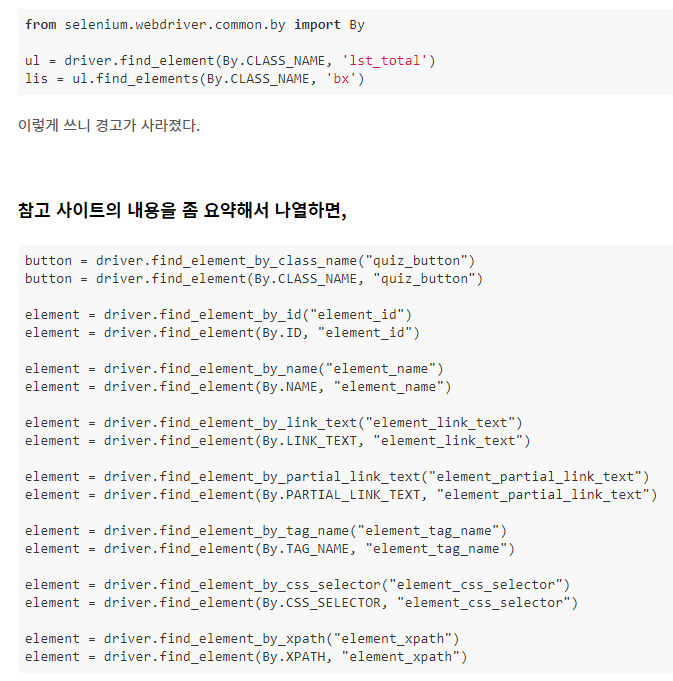

### 네이버 로그인하기

In [56]:
#!pip install pyperclip

  Preparing metadata (setup.py) ... done
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=69226c0f11fdc619d83758f2d9048fc108d3423d3cd2e5299527f2da213d77b9
  Stored in directory: /Users/hyunjinkim/Library/Caches/pip/wheels/0c/09/9e/49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip
You should consider upgrading via the '/Users/hyunjinkim/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


In [63]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By # 자동으로 웹드라이버 구현하여 사용 
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
import pyperclip





In [83]:
driver = Chrome("../chromedriver") # chromedriver 파일 위치
driver.get("http://naver.com")

/var/folders/3x/ck_8z3cd6r510s7t3t_g1nzm0000gn/T/ipykernel_1012/1148269179.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = Chrome("../chromedriver") # chromedriver 파일 위치


In [84]:
# 네이버 로그인 화면 이동 
driver.find_element(By.XPATH, '//*[@id="account"]/a').click()

In [39]:
## 너 로봇이니? 뜰 수 있음 

# 네이버 로그인 - 아이디 입력
driver.find_element(By.NAME,"id").clear() # 중복입력 방지
driver.find_element(By.NAME,"id").send_keys("")  # .send_keys("실제 네이버 아이디")
# 네이버 로그인 - 패스워드 입력
driver.find_element(By.NAME,"pw").clear() # 중복입력 방지
driver.find_element(By.NAME,"pw").send_keys("") # .send_keys("실제 네이버 패스워드")

In [86]:
# 네이버 로그인 버튼 클릭
driver.find_element(By.XPATH, '//*[@id="log.login"]').click()

In [85]:
## 회피 
id = ""
pw = ""

pyperclip.copy(id)
driver.find_element(By.NAME,"id").clear()
driver.find_element(By.NAME, "id").send_keys(id)
#ActionChains(driver).key_down(Keys.CONTROL).send_keys("v").key_up(Keys.CONTROL).perform()
time.sleep(1)

pyperclip.copy(pw)
driver.find_element(By.NAME,"pw").clear()
driver.find_element(By.NAME, "pw").send_keys(pw)
#ActionChains(driver).key_down(Keys.CONTROL).send_keys("v").key_up(Keys.CONTROL).perform()
# 맥은 cmd + v
time.sleep(1)

# 네이버 로그인 버튼 클릭
#driver.find_element(By.XPATH, '//*[@id="log.login"]').click()

In [ ]:
###### 강사님 ######

##회피
id=""
pw=""

pyperclip.copy(id)
driver.find_element(By.NAME,"id").clear()
driver.find_element(By.NAME, "id").click()
driver.find_element(By.NAME, "id").send_keys(Keys.CONTROL, "v")
#ActionChains(driver).key_down(Keys.CONTROL).send_keys("v").key_up(Keys.CONTROL).perform()
time.sleep(1)

pyperclip.copy(pw)
driver.find_element(By.NAME,"pw").clear()
driver.find_element(By.NAME, "pw").click()
driver.find_element(By.NAME, "pw").send_keys(Keys.CONTROL, "v")
#ActionChains(driver).key_down(Keys.CONTROL).send_keys("v").key_up(Keys.CONTROL).perform()
time.sleep(1)

driver.find_element(By.XPATH, '//*[@id="log.login"]').click()